In [6]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.preprocessing import minmax_scale


# generate a single sine wave for a specified time period
def sine_wave_generator(frequency = 5e5, duration = 5e-4, sample_rate = 6e6, amplitude = 1, start_time = 0, end_time = None):
    #Sanity check with timings    
    if duration <= start_time: print("Bad timing! Check start time.")
        
    
#    if start_time == 0:
        
#        x = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
#        frequencies = x * frequency
#        clean_signal = amplitude * np.sin((2 * np.pi) * frequencies)


    if end_time == None:
            end_time = duration
        
    # Filling the bins with zeros before signal starts
    x = np.linspace(0, start_time, int(sample_rate * start_time), endpoint=False)
    frequencies = x * frequency
    clean_signal = 0 * frequencies
      
    # Generating sine wave signal for the signal duration
    y = np.linspace(start_time, duration, int(sample_rate * (end_time-start_time)), endpoint=False)
    frequencies = y * frequency
    clean_signal = np.append(clean_signal, amplitude * np.sin((2 * np.pi) * frequencies))
        
    # Filling the bins with zeros after signal ends
    z = np.linspace(end_time, duration, int(sample_rate * (duration - end_time)), endpoint=False)
    frequencies = z * frequency
    clean_signal = np.append(clean_signal, 0 * frequencies)
          
        
    return clean_signal


# generate white noise 
def noise_generator(duration = 5e-4, amplitude = 1, sample_rate = 6e6, mu = 0, sigma = 0.5):
    #making sure signal and noise have the same dimension
    time_steps = int(sample_rate*duration)
    noise = amplitude * np.random.normal(mu, sigma, time_steps) 

    return noise



In [9]:
# generate a chirp and mix that with white noise

import random
from datetime import datetime
random.seed(datetime.now().timestamp())


first_harmonic_time_diff = random.uniform(1e4, 2e4)
second_harmonic_time_diff = random.uniform(3.2e4, 6e4)

first_harmonic_amp = random.uniform(0.3, 0.5)
second_harmonic_amp = random.uniform(0.3, 0.6)


def signal_generator(frequency = 5e5, duration = 5e-4, sample_rate = 6e6, start_time = 2e-4, end_time = 4.5e-4, signal_amplitude = 0.01, noise_amplitude = 1, mu = 0, sigma = 0.5):
    
    # creating gaussian white noise for the entire duration 
    noise = noise_generator(duration, noise_amplitude, sample_rate, mu, sigma) 

    #Generating desired chirping signal and making sure it has the same dimension as noise
    clean_signal1 = sine_wave_generator(frequency - second_harmonic_time_diff, duration, sample_rate, signal_amplitude * second_harmonic_amp, start_time, end_time)

    
    clean_signal2 = sine_wave_generator(frequency - first_harmonic_time_diff, duration, sample_rate, signal_amplitude * first_harmonic_amp, start_time, end_time)
    

    clean_signal3 = sine_wave_generator(frequency, duration, sample_rate, signal_amplitude, start_time, end_time)
    

    clean_signal4 = sine_wave_generator(frequency + first_harmonic_time_diff, duration, sample_rate, signal_amplitude * first_harmonic_amp, start_time, end_time)
    

    clean_signal5 = sine_wave_generator(frequency + second_harmonic_time_diff, duration, sample_rate, signal_amplitude * second_harmonic_amp, start_time, end_time)
    
    
    clean_signal = clean_signal1 + clean_signal2 + clean_signal3 + clean_signal4 + clean_signal5
    clean_signal = np.resize(clean_signal, noise.shape)    
    
    
    return clean_signal, (clean_signal + noise)



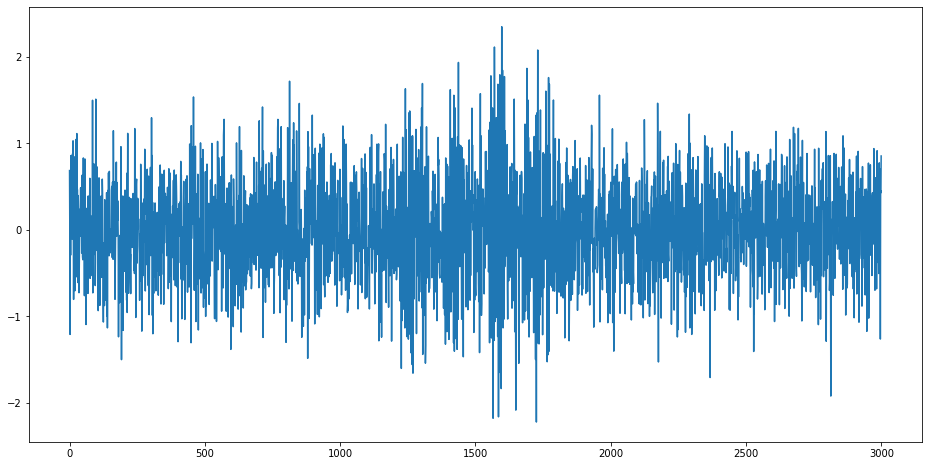

In [10]:

#noise = noise_generator()

_, signal1 = signal_generator(frequency = 4e5, start_time = 1e-4, end_time = 4e-4, signal_amplitude = 0.1)
_, signal2 = signal_generator(frequency = 6e5, start_time = 2e-4, end_time = 3e-4, signal_amplitude = 0.6)
_, signal3 = signal_generator(frequency = 8e5, start_time = 1e-4, signal_amplitude = 0.08)


# Troubleshooting
#import sys
#np.set_printoptions(threshold=sys.maxsize)
#print(signal1)


signal = signal2
figure(figsize=(16, 8))
#plt.plot(noise, label="noise")
plt.plot(signal)
plt.show()


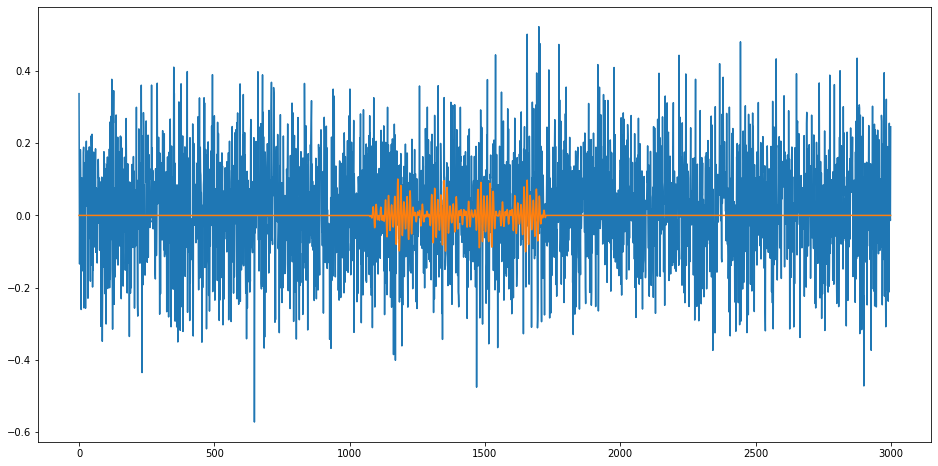

[0.56126835 0.30947438 0.22661133 ... 0.24456671 0.17446968 0.26140545]


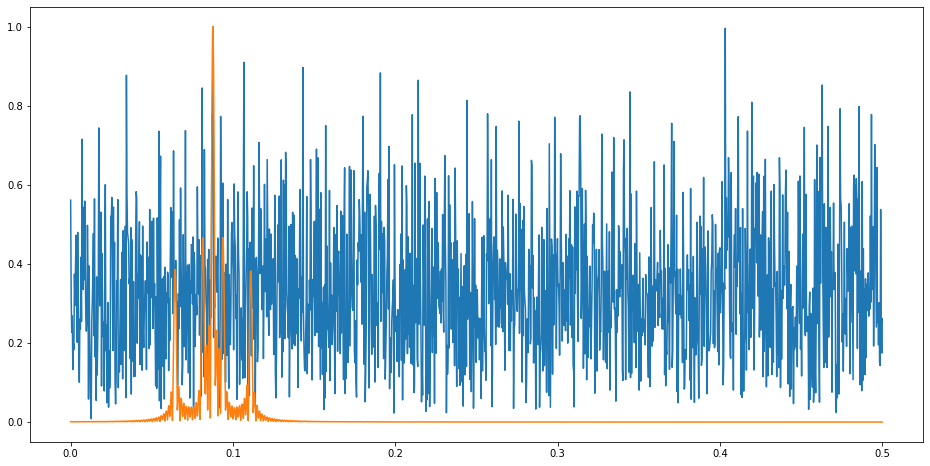

In [11]:
#generating a random noisy signal


frequency = random.uniform(5e5, 5e7)
start_time = random.uniform(0, 2.5e-4)
end_time = random.uniform(2.6e-4, 5e-4)
signal_amplitude = random.uniform(0.02, 0.06)
noise_amplitude = random.uniform(0.7, 1)
mu = random.uniform(-0.05, 0.05)
sigma = random.uniform(0.1, 0.2)


signal, noisy_signal = signal_generator(frequency = frequency, start_time = start_time, end_time = end_time, signal_amplitude = signal_amplitude, noise_amplitude = noise_amplitude, mu = mu, sigma = sigma)

plt.figure(figsize=(16,8))
plt.plot(noisy_signal)
plt.plot(signal, label = "signal")
plt.show()



# Plotting normalized Fourier transform of the above signal

import scipy
from scipy.fft import rfft, rfftfreq
#import pyfftw as fftw

# Number of samples in signal
N = 3000

yf = rfft(noisy_signal)[1:]/np.amax(np.abs(rfft(noisy_signal)[1:]))
xf = rfftfreq(N-2, 1)

ys = rfft(signal)[1:]/np.amax(np.abs(rfft(signal)[1:]))
xs = rfftfreq(N-2, 1)

print(np.abs(yf))
# yt = np.array(0.1)
# fftw.FFTW(signal, yt, axis = None)

plt.figure(figsize=(16,8))
plt.plot(xf, np.abs(yf))
plt.plot(xs, np.abs(ys))
#plt.plot(yt)
plt.show()



In [ ]:
import pandas as pd

no_of_noisy_signal_windows = 1000
no_of_noise_windows = 5000

noisy_signal_array = [] #np.ndarray(shape=(no_of_noisy_signal_windows,1))
signal_array = [] #np.ndarray(shape=(no_of_noisy_signal_windows,1))


# produces signal with noise background, outputs the burried signal too
for i in range(0, no_of_noisy_signal_windows):
    
    frequency = random.uniform(5e5, 5e7)
    start_time = random.uniform(0, 2.5e-4)
    end_time = random.uniform(2.6e-4, 5e-4)
    signal_amplitude = random.uniform(0.02, 0.06)
    noise_amplitude = random.uniform(0.8, 1.1)
    mu = random.uniform(-0.05, 0.05)
    sigma = random.uniform(0.1, 0.2)


    signal, noisy_signal = signal_generator(frequency = frequency, start_time = start_time, end_time = end_time, signal_amplitude = signal_amplitude, noise_amplitude = noise_amplitude, mu = mu, sigma = sigma)

    noisy_signal_array = np.append(noisy_signal_array, np.abs(rfft(noisy_signal))[1:]/np.amax(np.abs(rfft(noisy_signal))[1:]))
    noisy_signal_array = np.append(noisy_signal_array, 1)
#    signal_array = np.append(signal_array, signal)

# print(noisy_signal_array)
# produces windows of data with only white noise

for j in range(0, no_of_noise_windows):

    amplitude = random.uniform(0.8, 1.1)
    mu = random.uniform(-0.05, 0.05)
    sigma = random.uniform(0.1, 0.2)
    
    noise = noise_generator(amplitude = amplitude, mu = mu, sigma = sigma)
    
    noisy_signal_array = np.append(noisy_signal_array, np.abs(rfft(noise))[1:]/np.amax(np.abs(rfft(noise))[1:]))
    noisy_signal_array = np.append(noisy_signal_array, 0)
#    signal_array = np.append(signal_array, noise*0)

# Arranging all data points in rows, last column represents the presence (1) or absence (0) of a signal
noisy_signal_array = np.reshape(noisy_signal_array, ((no_of_noisy_signal_windows + no_of_noise_windows),1501))
# import sys
# np.set_printoptions(threshold=sys.maxsize)
#print(noisy_signal_array)    

df = pd.DataFrame(noisy_signal_array)

#print(df)

df.to_csv("timeseries_row_test_new.csv", header = None, index = None)
    

In [2]:
!pip install scikeras
!pip install sklearn
!pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2955 sha256=99e2519b45b5ecb873af273ecbbe4521b3b443e8b374ff68e86ebd4ff8804597
  Stored in directory: /root/.cache/pip/wheels/f8/e0/3d/9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
Successfully built sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.2 MB/s eta 0:00:00


In [3]:
import pandas as pd
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, MaxPooling2D, Conv2D, Dropout, Flatten, Reshape, BatchNormalization
#from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [4]:
# load dataset
#dataframe = pd.read_csv("timeseries_row_test_new.csv", header=None)

####### mount data from google drive ############
from google.colab import drive
drive.mount('/content/drive')
dataframe = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/timeseries_row_test_new.csv", header=None)

dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:1500].astype(float)
Y = dataset[:,1500]

print(Y)

Mounted at /content/drive
[1. 1. 1. ... 0. 0. 0.]


Epoch 1/20
450/450 [==============================] - 70s 147ms/step - loss: 0.2785 - f1_score: 0.5741 - val_loss: 0.0800 - val_f1_score: 0.0000e+00
Epoch 2/20
450/450 [==============================] - 64s 142ms/step - loss: 0.2197 - f1_score: 0.7160 - val_loss: 0.0730 - val_f1_score: 0.0000e+00
Epoch 3/20
450/450 [==============================] - 66s 147ms/step - loss: 0.2146 - f1_score: 0.7186 - val_loss: 0.0802 - val_f1_score: 0.0000e+00
Epoch 4/20
450/450 [==============================] - 65s 145ms/step - loss: 0.2134 - f1_score: 0.7210 - val_loss: 0.0907 - val_f1_score: 0.0000e+00
Epoch 5/20
450/450 [==============================] - 68s 152ms/step - loss: 0.2116 - f1_score: 0.7227 - val_loss: 0.0928 - val_f1_score: 0.0000e+00
Epoch 6/20
450/450 [==============================] - 67s 148ms/step - loss: 0.2101 - f1_score: 0.7251 - val_loss: 0.0794 - val_f1_score: 0.0000e+00
Epoch 7/20
450/450 [==============================] - 66s 147ms/step - loss: 0.2101 - f1_score: 0.7257 - v

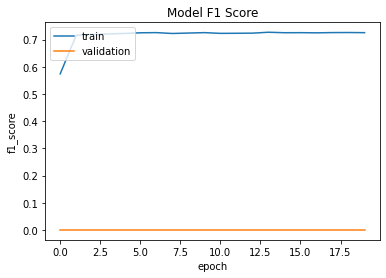

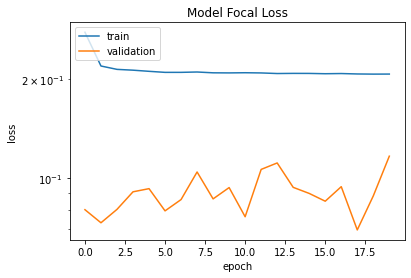

In [7]:

model2 = Sequential()

model2.add(Reshape((100,15), input_shape = (1500,)))

model2.add(LSTM(32, activation='tanh', return_sequences=True))
#model2.add(Dropout(0))

model2.add(BatchNormalization())

model2.add(LSTM(40, activation='tanh'))
model2.add(Dropout(0.2))

model2.add(Dense(32, activation='relu'))

model2.add(Flatten())

model2.add(Dense(1, activation='sigmoid'))
#model2.add(Dropout(0.1))

f1_score = tfa.metrics.F1Score(num_classes=1, threshold=0.3)

# Compile model 
model2.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(alpha=0.25, gamma = 0.5, from_logits=True), optimizer= "SGD", metrics= [f1_score])

# Fitting model
plot_progress2 = model2.fit(X, Y, validation_split=0.25, epochs=20, batch_size=100, shuffle=True, verbose=1 )
#model2.save('/content/model/RNN')

# history for accuracy
plt.plot(plot_progress2.history['f1_score'])
plt.plot(plot_progress2.history['val_f1_score'])
plt.title('Model F1 Score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(plot_progress2.history['loss'])
plt.plot(plot_progress2.history['val_loss'])
plt.title('Model Focal Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.yscale('log')
plt.show()

In [26]:

####################### FOR TESTING TRAINED NETWORK ############################


noisy_signal_array = []
for i in range(0, 10):
    
    frequency = random.uniform(5e5, 5e7)
    start_time = random.uniform(0, 2.5e-4)
    end_time = random.uniform(2.6e-4, 5e-4)
    signal_amplitude = random.uniform(0.02, 0.1)
    noise_amplitude = random.uniform(0.9, 1.1)
    mu = random.uniform(-0.05, 0.05)
    sigma = random.uniform(0.1, 0.2)


    signal, noisy_signal = signal_generator(frequency = frequency, start_time = start_time, end_time = end_time, signal_amplitude = signal_amplitude, noise_amplitude = noise_amplitude, mu = mu, sigma = sigma)

    noisy_signal_array = np.append(noisy_signal_array, np.abs(rfft(noisy_signal))[1:]/np.amax(np.abs(rfft(noisy_signal))[1:]))
   # noisy_signal_array = np.append(noisy_signal_array)

#resetting noisy signal array to feed noise data only
#noisy_signal_array = []

for j in range(0, 10):

    amplitude = random.uniform(0.9, 1)
    mu = random.uniform(-0.05, 0.05)
    sigma = random.uniform(0.1, 0.2)
    
    noise = noise_generator(amplitude = amplitude, mu = mu, sigma = sigma)
    
    noisy_signal_array = np.append(noisy_signal_array, np.abs(rfft(noise))[1:]/np.amax(np.abs(rfft(noise))[1:]))
#    noisy_signal_array = np.append(noisy_signal_array, 0)


test_signal_array = np.reshape(noisy_signal_array, (20,1500))

test_df = pd.DataFrame(test_signal_array)

#print(test_df)

# converting to np_array for efficient feeding
test_df = test_df.values


In [27]:
model2.save('/content/model/')
import keras
model = keras.models.load_model('/content/model/')
X_test = test_df[:,0:1500].astype(float)
print(len(X_test[4]))

1500


In [28]:
model.predict([X_test])

1/1 [==============================] - 0s 44ms/step


array([[0.99578774],
       [0.99551153],
       [0.21328318],
       [0.99627113],
       [0.99705136],
       [0.97525734],
       [0.99635345],
       [0.9971036 ],
       [0.42177257],
       [0.9968048 ],
       [0.16822803],
       [0.10981879],
       [0.10653818],
       [0.06821813],
       [0.09623139],
       [0.10072407],
       [0.10541168],
       [0.09560462],
       [0.15652023],
       [0.2702206 ]], dtype=float32)